In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
data = pd.read_csv('data/iris.data',header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data.iloc[:,:4].to_numpy()

labels = data.iloc[:,4].to_numpy()
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [6]:
clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X_test, y_test))

2
0.9733333333333334


In [31]:
def plot_clf(clf, title=""):
    test_sizes = np.arange(0.05, 0.95, 0.05)
    wrong_results = []
    accuracies = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630443)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        wrong_results.append((y_test != y_pred).sum())
        accuracies.append(clf.score(X_test, y_test))


    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(test_sizes, wrong_results, label = "Wrong classified")
    axs[1].plot(test_sizes, accuracies, label = "Accuracy")
    axs[0].legend()
    axs[1].legend()
    axs[0].set_xlabel(title)
    axs[1].set_xlabel(title)
    plt.tight_layout()
    plt.show()
    max_acc_index = accuracies.index(np.max(accuracies))
    print(wrong_results[max_acc_index])
    print(np.max(accuracies))

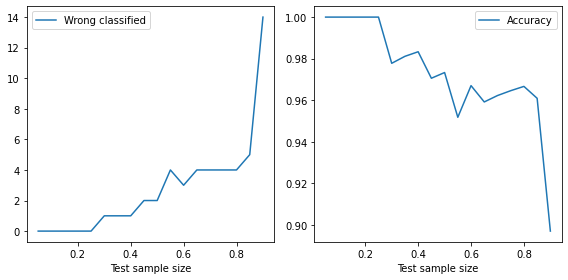

0
1.0


In [14]:
plot_clf(LinearDiscriminantAnalysis(), "Test sample size")

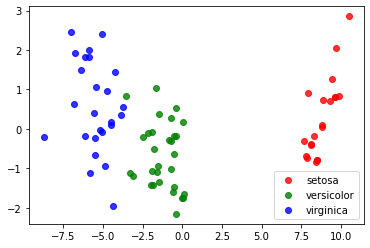

In [15]:
data_transformed = clf.transform(X_train)

labels = ['setosa', 'versicolor', 'virginica']

plt.figure()

colors = ['red', 'green', 'blue']
lw = 2

for color, i, label_ in zip(colors, [0, 1, 2], labels):
    plt.scatter(data_transformed[y_train == i, 0], data_transformed[y_train == i, 1], alpha=.8, color=color,
                label=label_)
plt.legend(loc='best', shadow=False, scatterpoints=1)

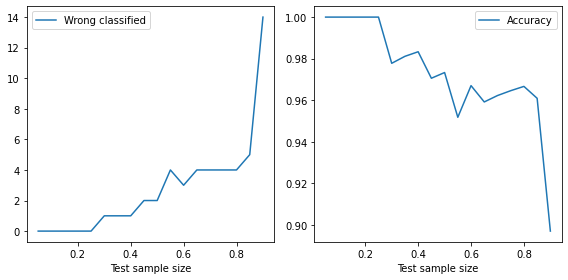

0
1.0


In [19]:
plot_clf(LinearDiscriminantAnalysis(solver='lsqr'), "Test sample size")

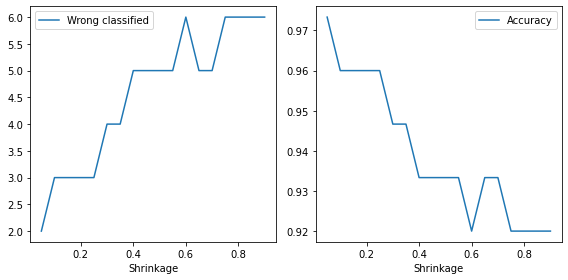

2
0.9733333333333334


In [26]:
shrinkages = np.arange(0.05, 0.95, 0.05)
wrong_results = []
accuracies = []

for sh in shrinkages:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=630443)
    clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage=sh)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))


fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(shrinkages, wrong_results, label = "Wrong classified")
axs[1].plot(shrinkages, accuracies, label = "Accuracy")
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("Shrinkage")
axs[1].set_xlabel("Shrinkage")
plt.tight_layout()
plt.show()
max_acc_index = accuracies.index(np.max(accuracies))
print(wrong_results[max_acc_index])
print(np.max(accuracies))

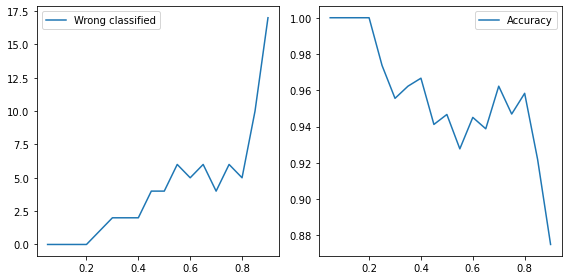

0
1.0


In [27]:
clf = LinearDiscriminantAnalysis(priors=[0.15, 0.7, 0.15])
plot_clf(clf)

In [29]:
svc = svm.SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(svc.score(X, Y))

4
0.9533333333333334


In [30]:
print(svc.support_vectors_)
print(svc.support_)
print(svc.n_support_)

[[4.8 3.4 1.9 0.2]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.1 3.3 1.7 0.5]
 [5.7 2.6 3.5 1. ]
 [6.7 3.1 4.7 1.5]
 [5.7 2.8 4.5 1.3]
 [5.  2.3 3.3 1. ]
 [5.5 2.6 4.4 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [6.2 2.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.1 3.  4.6 1.4]
 [4.9 2.4 3.3 1. ]
 [6.4 3.2 4.5 1.5]
 [6.6 3.  4.4 1.4]
 [6.6 2.9 4.6 1.3]
 [6.3 3.3 4.7 1.6]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.2 3.4 5.4 2.3]
 [6.3 2.8 5.1 1.5]
 [6.4 2.8 5.6 2.2]
 [5.8 2.8 5.1 2.4]
 [7.2 3.  5.8 1.6]
 [4.9 2.5 4.5 1.7]
 [6.8 3.  5.5 2.1]
 [6.7 3.  5.2 2.3]
 [6.5 3.  5.5 1.8]
 [6.4 2.8 5.6 2.1]
 [6.1 3.  4.9 1.8]
 [7.7 3.8 6.7 2.2]
 [6.5 3.2 5.1 2. ]
 [5.7 2.5 5.  2. ]
 [5.8 2.7 5.1 1.9]]
[ 1 12 15 29  7 11 14 16 19 24 25 27 33 34 35 38 43 51 54 63 66 67 73  5
  6  9 13 17 22 30 39 40 50 53 58 60 62 72]
[ 4 19 15]


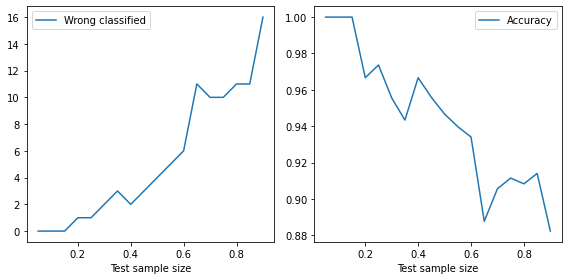

0
1.0


In [33]:
plot_clf(svm.SVC(), "Test sample size")

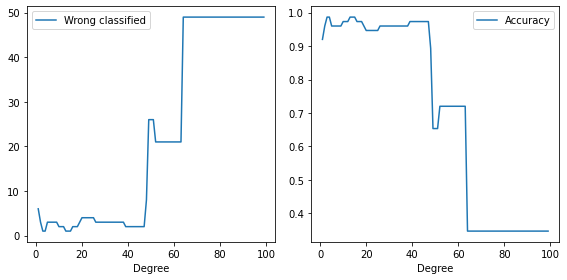

1
0.9866666666666667


In [37]:
degrees = np.arange(1, 100, 1)
wrong_results = []
accuracies = []

for d in degrees:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=630443)
    clf = svm.SVC(kernel='poly', degree=d)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))


fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(degrees, wrong_results, label = "Wrong classified")
axs[1].plot(degrees, accuracies, label = "Accuracy")
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("Degree")
axs[1].set_xlabel("Degree")
plt.tight_layout()
plt.show()
max_acc_index = accuracies.index(np.max(accuracies))
print(wrong_results[max_acc_index])
print(np.max(accuracies))

/home/humanoid/Learning/big-ml-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/humanoid/Learning/big-ml-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/humanoid/Learning/big-ml-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/humanoid/Learning/big-ml-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_it

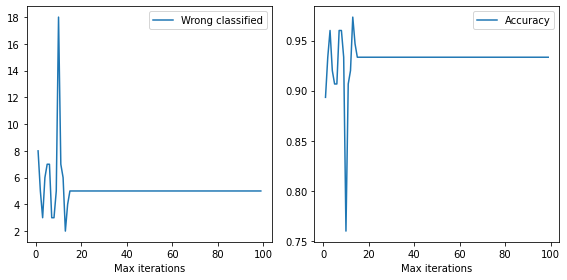

2
0.9733333333333334


In [45]:
iters = np.arange(1, 100, 1)
wrong_results = []
accuracies = []

for i in iters:
    X_scaled = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=630443)
    clf = svm.SVC(max_iter=i)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    wrong_results.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))


fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(iters, wrong_results, label = "Wrong classified")
axs[1].plot(iters, accuracies, label = "Accuracy")
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("Max iterations")
axs[1].set_xlabel("Max iterations")
plt.tight_layout()
plt.show()
max_acc_index = accuracies.index(np.max(accuracies))
print(wrong_results[max_acc_index])
print(np.max(accuracies))

In [48]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print((y_test != y_pred).sum())
    print(clf.score(X, Y))

1
0.9866666666666667
2
0.98
2
0.9666666666666667
52
0.3333333333333333


In [56]:
clfs = [svm.SVC(), svm.LinearSVC(), svm.NuSVC()]

for c in clfs:
    y_pred = c.fit(X_train, y_train).predict(X_test)
    print((y_test != y_pred).sum())
    print(c.score(X, Y))

2
0.9666666666666667
4
0.96
3
0.9733333333333334


/home/humanoid/Learning/big-ml-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


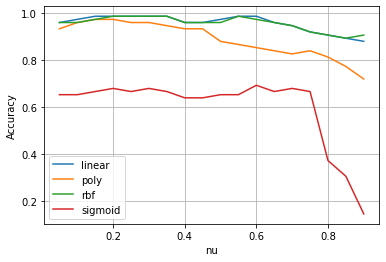

In [55]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    nus = np.arange(0.05, 0.95, 0.05)
    accuracies = []
    for n in nus:
        clf = svm.NuSVC(kernel=kernel, nu=n)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        accuracies.append(clf.score(X_test, y_test))
    
    plt.plot(nus, accuracies)
    
    plt.grid(b=True)

plt.xlabel('nu')
plt.ylabel('Accuracy')
plt.legend(kernels)
plt.show()